## Model on AZ: Notes
Features:
- check similar businesses within one mile
- - share at least one category
- - within one mile
- size of chain
- same business type density
- star rating
- business age
- reviews per week
- relative reviews per week

In [303]:
import warnings
import pandas as pd
import numpy as np
import json
from textblob import TextBlob
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, accuracy_score, r2_score, confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
import time
import seaborn as sn
warnings.simplefilter('ignore')

In [7]:
# df_business = pd.read_json('../yelp_dataset/business.json', lines=True)
# df_bus_AZ = df_business[df_business['state']=='AZ']
# all_ids = df_bus_AZ['business_id'].to_numpy()

# df_bus_AZ.to_json(r'AZ_business.json', orient='records')

In [8]:
# reviews = []
# for l in open("../yelp_dataset/review.json").readlines():
#     data = json.loads(l)
#     if data['business_id'] in all_ids:
#         reviews.append(data)
            
# df_reviews = pd.DataFrame.from_records(reviews)

# df_reviews.to_json(r'AZ_review.json',orient='records')

In [3]:
AZ_bus = pd.read_json('AZ_business_with_times.json')
AZ_rev = pd.read_json('AZ_review.json')

In [4]:
AZ_rev = AZ_rev.rename(columns={'stars': 'rating'})
# df_join = AZ_rev.join(AZ_bus.set_index('business_id'), on='business_id')

In [5]:
AZ_rev

,review_id,user_id,business_id,rating,useful,funny,cool,text,date
0,2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5,3,0,0,I have to say that this office really has it t...,2016-11-09 20:09:03
1,11a8sVPMUFtaC7_ABRkmtw,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1,7,0,0,Today was my second out of three sessions I ha...,2018-01-30 23:07:38
2,8e9HxxLjjqc9ez5ezzN7iQ,d6xvYpyzcfbF_AZ8vMB7QA,zvO-PJCpNk4fgAVUnExYAA,1,3,1,1,This place has gone down hill. Clearly they h...,2010-10-05 19:12:35
3,-I5umRTkhw15RqpKMl_o1Q,-mA3-1mN4JIEkqOtdbNXCQ,mRUVMJkUGxrByzMQ2MuOpA,1,0,1,0,"Walked in around 4 on a Friday afternoon, we s...",2017-12-15 23:27:08
4,6BnQwlxRn7ZuWdzninM9sQ,JSrP-dUmLlwZiI7Dp3PQ2A,cHdJXLlKNWixBXpDwEGb_A,3,1,7,1,I love chinese food and I love mexican food. W...,2015-04-01 16:30:00
...,...,...,...,...,...,...,...,...,...
2082946,h4NWUfHZPKU5oJ3Qt2c0Rw,KYObsUPFgkOFUxKBUFNOTA,mFTSdfJOv4X5t8LeeY4nJw,5,0,0,0,"Great food aside, I really want to make a shou...",2018-11-10 20:50:44
2082947,nTy6Atxlhrykoz5bXroT0w,LRh7vAnTwvlO0yHP12rxRg,7qH4yhLwwDwIi9tsI8AtKQ,1,0,0,0,Parking is ok now that baseball is over. But t...,2018-11-02 23:48:41
2082948,bzQFrsMDtGIVOeXp5gbNeg,g5K5E9QrxObn6ZC1q8Mb9g,CRVtzesMuwHK-phmS_ojaA,4,0,0,0,Great for a quick stop for a pre-made slice of...,2012-03-29 23:35:45
2082949,0sf0k7p1b1krPfcbP62W5A,Ob6ToKjLna3WOZtrI_m0nw,t1P_vLIyJCIoEaUVcwHdTw,1,2,1,1,We've been here b4 with no major problems but ...,2013-09-21 18:14:30


# size of chain

In [140]:
test = AZ_bus.groupby('name', as_index=False).count()

In [142]:
test[['name','business_id']]

,name,business_id
0,L & A Insurance Services,1
1,"""T""s Hair Affair",1
2,#1 Elite Nails,1
3,#1 Fried Rice,1
4,#1 Sushi,1
...,...,...
43827,zpizza,2
43828,zpizza Tap Room,1
43829,Ûr Market & Eden's Juice Bar,1
43830,Überrito,1


In [194]:
chains = []
for i in list(range(0,len(AZ_bus))):
    chains.append(test[test.name==AZ_bus.iloc[i]['name']].business_id.values[0])

In [189]:
test[test['name'] == '​Century Library']['business_id'].values[0]

1

In [195]:
chains

[1,
 1,
 1,
 110,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 6,
 193,
 1,
 1,
 1,
 14,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 8,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 15,
 1,
 1,
 1,
 44,
 1,
 1,
 1,
 1,
 1,
 14,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 19,
 68,
 1,
 1,
 1,
 47,
 1,
 1,
 5,
 1,
 20,
 1,
 1,
 1,
 2,
 7,
 1,
 1,
 1,
 1,
 29,
 1,
 1,
 1,
 1,
 2,
 32,
 1,
 1,
 1,
 1,
 55,
 1,
 1,
 1,
 2,
 1,
 1,
 4,
 1,
 82,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 10,
 1,
 1,
 3,
 1,
 1,
 3,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 7,
 2,
 1,
 9,
 256,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 12,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 256,
 1,
 1,
 27,
 1,
 1,
 1,
 8,
 1,
 10,
 4,
 1,
 1,
 1,
 7,
 1,
 1,
 2,
 2,
 55,
 1,
 1,
 1,
 7,
 1,
 16,
 1,
 1,
 1,
 2,
 1,
 3,
 1,
 1,
 16,
 1,
 69,
 1,
 5,
 1,
 27,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 41,
 1,
 264,
 1,
 7,


In [196]:
AZ_bus['chains'] = chains

In [197]:
AZ_bus

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,chains
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,{'GoodForKids': 'False'},"Golf, Active Life",None,1
1,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,"15655 W Roosevelt St, Ste 237",Goodyear,AZ,85338,33.455613,-112.395596,5.0,3,1,None,"Insurance, Financial Services","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1
2,Y6iyemLX_oylRpnr38vgMA,Vita Bella Fine Day Spa,5940 W Union Hills Dr,Glendale,AZ,85308,33.654815,-112.188568,5.0,8,0,"{'RestaurantsPriceRange2': '2', 'ByAppointment...","Nail Salons, Beauty & Spas, Day Spas","{'Tuesday': '12:0-18:0', 'Wednesday': '10:0-18...",1
3,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,2450 E Indian School Rd,Phoenix,AZ,85016,33.495194,-112.028588,3.0,18,1,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...","Restaurants, Breakfast & Brunch, Mexican, Taco...","{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",110
4,giC3pVVFxCRR89rApqklyw,Knot Salon,"4848 E Cactus Rd, Ste 100",Scottsdale,AZ,85254,33.600071,-111.977371,5.0,5,1,"{'BusinessAcceptsCreditCards': 'True', 'Busine...","Hair Stylists, Beauty & Spas, Hair Salons, Men...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-19:0', '...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56681,ABjONdA5Fw8XBOM65tmW4w,Phend Plumbing & Rooter,343 N Gilbert Rd,Gilbert,AZ,85234,33.356540,-111.789367,5.0,47,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Plumbing, Water Heater Installation/Repair, Pr...","{'Monday': '7:0-17:0', 'Tuesday': '7:0-17:30',...",1
56682,ZidLd2a1uJCMfIhLylX5ww,Team Canine,,Phoenix,AZ,85076,33.347160,-111.975380,4.5,19,1,None,"Pet Training, Professional Services, Pet Servi...","{'Monday': '8:0-19:30', 'Tuesday': '8:0-19:30'...",1
56683,jJoPLIhCjkGXy59I4Jl6zw,JW Marriott Phoenix Desert Ridge Resort & Spa,5350 E Marriott Dr,Phoenix,AZ,85054,33.683910,-111.966235,4.0,441,1,"{'BusinessAcceptsBitcoin': 'False', 'GoodForKi...","Golf, Hotels, Day Spas, Hotels & Travel, Event...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1
56684,MiEyUDKTjeci5TMfxVZPpg,Phoenix Pavers,21230 N 22nd St,Phoenix,AZ,85024,33.679992,-112.035569,4.5,14,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Contractors, Landscaping, Mason...","{'Monday': '7:0-15:0', 'Tuesday': '7:0-15:0', ...",1


# BUSINESS AGE
- open: diff b/w today and first review
- closed: diff b/w last review and first review

In [214]:
# start = AZ_rev.loc[AZ_rev.groupby('business_id')['date'].idxmin()]

In [219]:
start = AZ_rev.groupby('business_id',as_index=False)['date'].min()

In [220]:
end = AZ_rev.groupby('business_id',as_index=False)['date'].max()

In [222]:
start

,business_id,date
0,--8LPVSo5i0Oo61X01sV9A,2014-05-15 17:07:54
1,--9QQLMTbFzLJ_oT-ON3Xw,2013-05-15 09:20:14
2,--FLdgM0GNpXVMn74ppCGw,2012-08-09 20:44:49
3,--KQsXc-clkO7oHRqGzSzg,2009-10-27 04:08:12
4,--Rsj71PBe31h5YljVseKA,2011-12-13 07:02:46
...,...,...
56679,zzsU528uoRB6qZUGhKDa6w,2007-09-21 05:58:58
56680,zzt8omL4h_tdLYpY_rlZ4w,2015-08-29 04:13:39
56681,zzuOCWxuY39YJ1wnTwQ0Lg,2016-05-25 23:00:07
56682,zzwaS0xn1MVEPEf0hNLjew,2007-11-28 23:15:10


In [244]:
mx = []
mn = []
for i in list(range(0,len(AZ_bus))):
    if not start[start['business_id']==AZ_bus.iloc[i]['business_id']]['date'].empty:
        mn.append(start[start['business_id']==AZ_bus.iloc[i]['business_id']]['date'].values[0])
    else:
        mn.append(0)
    if not end[end['business_id']==AZ_bus.iloc[i]['business_id']]['date'].empty:
        mx.append(end[end['business_id']==AZ_bus.iloc[i]['business_id']]['date'].values[0])
    else:
        mx.append(0)
#     if not start[start['business_id']==AZ_bus.iloc[i]['business_id']]['date'].empty:
#         mn.append(start[start['business_id']==AZ_bus.iloc[i]['business_id']]['date'].values[0]
#     else: 
#         mn.append(0)
#     if not end[end['business_id']==AZ_bus.iloc[i]['business_id']]['date'].empty:
#         mx.append(end[end['business_id']==AZ_bus.iloc[i]['business_id']]['date'].values[0])
#     else:
#         mx.append(0)

In [245]:
mx

[numpy.datetime64('2016-05-19T00:50:17.000000000'),
 numpy.datetime64('2018-04-11T15:38:39.000000000'),
 numpy.datetime64('2014-10-01T22:13:35.000000000'),
 numpy.datetime64('2018-11-07T23:52:00.000000000'),
 numpy.datetime64('2018-06-13T09:14:02.000000000'),
 numpy.datetime64('2018-04-09T22:58:38.000000000'),
 numpy.datetime64('2014-02-03T23:13:48.000000000'),
 numpy.datetime64('2018-10-19T04:12:32.000000000'),
 numpy.datetime64('2018-08-22T17:32:41.000000000'),
 numpy.datetime64('2016-03-04T18:55:41.000000000'),
 numpy.datetime64('2017-12-08T01:21:32.000000000'),
 numpy.datetime64('2017-07-20T19:07:56.000000000'),
 numpy.datetime64('2018-10-07T17:37:26.000000000'),
 numpy.datetime64('2018-11-12T20:13:13.000000000'),
 numpy.datetime64('2018-09-20T04:23:19.000000000'),
 numpy.datetime64('2016-05-06T01:55:10.000000000'),
 numpy.datetime64('2016-04-09T16:31:42.000000000'),
 numpy.datetime64('2018-09-25T23:29:16.000000000'),
 numpy.datetime64('2018-10-27T18:45:15.000000000'),
 numpy.datet

In [246]:
AZ_bus['start_date'] = mn
AZ_bus['end_date'] = mx

In [204]:
AZ_rev.date = start['date'].astype(np.int64) // 10**9

In [251]:
AZ_bus_temp = AZ_bus.copy() # just in case

In [253]:
AZ_bus['start_date'] = AZ_bus['start_date'].astype(np.int64) // 10**9
AZ_bus['end_date'] = AZ_bus['end_date'].astype(np.int64) // 10**9

In [255]:
span = []
today = 1542219206 # most recent review in dataset
for i in list(range(0,len(AZ_bus))):
    if AZ_bus.iloc[i]['is_open'] == 1:
        span.append(today-AZ_bus.iloc[i]['start_date'])
    else:
        span.append(AZ_bus.iloc[i]['end_date']-AZ_bus.iloc[i]['start_date'])
    

In [262]:
AZ_bus['time_open'] = span

In [266]:
# AZ_bus.to_json(r'AZ_business_with_times.json',orient='records')

In [267]:
AZ_bus

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,chains,start_date,end_date,time_open
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,{'GoodForKids': 'False'},"Golf, Active Life",None,1,1427415698,1463619017,36203319
1,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,"15655 W Roosevelt St, Ste 237",Goodyear,AZ,85338,33.455613,-112.395596,5.0,3,1,None,"Insurance, Financial Services","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,1357063598,1523461119,185155608
2,Y6iyemLX_oylRpnr38vgMA,Vita Bella Fine Day Spa,5940 W Union Hills Dr,Glendale,AZ,85308,33.654815,-112.188568,5.0,8,0,"{'RestaurantsPriceRange2': '2', 'ByAppointment...","Nail Salons, Beauty & Spas, Day Spas","{'Tuesday': '12:0-18:0', 'Wednesday': '10:0-18...",1,1265924818,1412201615,146276797
3,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,2450 E Indian School Rd,Phoenix,AZ,85016,33.495194,-112.028588,3.0,18,1,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...","Restaurants, Breakfast & Brunch, Mexican, Taco...","{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",110,1222047403,1541634720,320171803
4,giC3pVVFxCRR89rApqklyw,Knot Salon,"4848 E Cactus Rd, Ste 100",Scottsdale,AZ,85254,33.600071,-111.977371,5.0,5,1,"{'BusinessAcceptsCreditCards': 'True', 'Busine...","Hair Stylists, Beauty & Spas, Hair Salons, Men...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-19:0', '...",1,1510248758,1528881242,31970448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56681,ABjONdA5Fw8XBOM65tmW4w,Phend Plumbing & Rooter,343 N Gilbert Rd,Gilbert,AZ,85234,33.356540,-111.789367,5.0,47,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Plumbing, Water Heater Installation/Repair, Pr...","{'Monday': '7:0-17:0', 'Tuesday': '7:0-17:30',...",1,1395894528,1542132140,146324678
56682,ZidLd2a1uJCMfIhLylX5ww,Team Canine,,Phoenix,AZ,85076,33.347160,-111.975380,4.5,19,1,None,"Pet Training, Professional Services, Pet Servi...","{'Monday': '8:0-19:30', 'Tuesday': '8:0-19:30'...",1,1219805477,1523299019,322413729
56683,jJoPLIhCjkGXy59I4Jl6zw,JW Marriott Phoenix Desert Ridge Resort & Spa,5350 E Marriott Dr,Phoenix,AZ,85054,33.683910,-111.966235,4.0,441,1,"{'BusinessAcceptsBitcoin': 'False', 'GoodForKi...","Golf, Hotels, Day Spas, Hotels & Travel, Event...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,1139952814,1540936381,402266392
56684,MiEyUDKTjeci5TMfxVZPpg,Phoenix Pavers,21230 N 22nd St,Phoenix,AZ,85024,33.679992,-112.035569,4.5,14,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Contractors, Landscaping, Mason...","{'Monday': '7:0-15:0', 'Tuesday': '7:0-15:0', ...",1,1264042522,1538841778,278176684


In [101]:
test2.date.max()

1542219206

Today: 1542219206

# REVIEWS PER WEEK

In [18]:
AZ_rev_per_wk = AZ_rev.copy()

In [19]:
AZ_rev_per_wk

,review_id,user_id,business_id,rating,useful,funny,cool,text,date
0,2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5,3,0,0,I have to say that this office really has it t...,2016-11-09 20:09:03
1,11a8sVPMUFtaC7_ABRkmtw,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1,7,0,0,Today was my second out of three sessions I ha...,2018-01-30 23:07:38
2,8e9HxxLjjqc9ez5ezzN7iQ,d6xvYpyzcfbF_AZ8vMB7QA,zvO-PJCpNk4fgAVUnExYAA,1,3,1,1,This place has gone down hill. Clearly they h...,2010-10-05 19:12:35
3,-I5umRTkhw15RqpKMl_o1Q,-mA3-1mN4JIEkqOtdbNXCQ,mRUVMJkUGxrByzMQ2MuOpA,1,0,1,0,"Walked in around 4 on a Friday afternoon, we s...",2017-12-15 23:27:08
4,6BnQwlxRn7ZuWdzninM9sQ,JSrP-dUmLlwZiI7Dp3PQ2A,cHdJXLlKNWixBXpDwEGb_A,3,1,7,1,I love chinese food and I love mexican food. W...,2015-04-01 16:30:00
...,...,...,...,...,...,...,...,...,...
2082946,h4NWUfHZPKU5oJ3Qt2c0Rw,KYObsUPFgkOFUxKBUFNOTA,mFTSdfJOv4X5t8LeeY4nJw,5,0,0,0,"Great food aside, I really want to make a shou...",2018-11-10 20:50:44
2082947,nTy6Atxlhrykoz5bXroT0w,LRh7vAnTwvlO0yHP12rxRg,7qH4yhLwwDwIi9tsI8AtKQ,1,0,0,0,Parking is ok now that baseball is over. But t...,2018-11-02 23:48:41
2082948,bzQFrsMDtGIVOeXp5gbNeg,g5K5E9QrxObn6ZC1q8Mb9g,CRVtzesMuwHK-phmS_ojaA,4,0,0,0,Great for a quick stop for a pre-made slice of...,2012-03-29 23:35:45
2082949,0sf0k7p1b1krPfcbP62W5A,Ob6ToKjLna3WOZtrI_m0nw,t1P_vLIyJCIoEaUVcwHdTw,1,2,1,1,We've been here b4 with no major problems but ...,2013-09-21 18:14:30


In [20]:
AZ_rev_per_wk['date'] = AZ_rev_per_wk['date'] - pd.to_timedelta(7, unit='d')
rev_per_wk = AZ_rev_per_wk.groupby(['business_id', pd.Grouper(key='date', freq='W-MON')]).count().reset_index().sort_values('date')


In [21]:
rev_per_wk

,business_id,date,review_id,user_id,rating,useful,funny,cool,text
1083626,iY_N3YhWL2_CUnBy41WK3w,2004-12-13,1,1,1,1,1,1,1
1087276,ikubvyZFO0kxhA56RETzIg,2004-12-20,1,1,1,1,1,1,1
667119,Rg4FHrDOD2DJeDY_khy-0w,2005-01-31,1,1,1,1,1,1,1
1375852,v9u0NgjA4iQeKGevFnYSCA,2005-03-07,1,1,1,1,1,1,1
1244848,pSQFynH1VxkfSmehRXlZWw,2005-03-07,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
314016,C9mrAke0xSBuglYJOK55Ag,2018-11-12,1,1,1,1,1,1,1
285454,Ax0kP-g5AMTZQlm3BH0H_Q,2018-11-12,1,1,1,1,1,1,1
1350439,u2Z7wvTpZJzQEhfFBS-06g,2018-11-12,1,1,1,1,1,1,1
1124710,kLgUNSjz0lsj0jaCWeYzoA,2018-11-12,1,1,1,1,1,1,1


In [16]:
AZ_bus[AZ_bus['business_id']=='iY_N3YhWL2_CUnBy41WK3w']

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,chains,start_date,end_date,time_open
46427,iY_N3YhWL2_CUnBy41WK3w,"Holley M Heyert, DC","16042 N 32nd St, Ste B1B, Back Bay Chiropractic",Phoenix,AZ,85032,33.633438,-112.013643,5.0,25,1,"{'AcceptsInsurance': 'True', 'ByAppointmentOnl...","Pets, Horse Racing, Veterinarians, Active Life...","{'Monday': '11:0-17:30', 'Wednesday': '16:0-19...",1,1103512139,1515111770,438707067


In [12]:
def diff(start, end):
    x = end - start
    return int(math.ceil(x / np.timedelta64(1, 'W')))

In [22]:
diff("2013-06-10","2013-06-16")

1

In [23]:
def my_aggr(data):
    wks = len(data)
    revs = data['review_id'].astype(int).sum()
    return revs / wks

In [32]:
df_rpw = rev_per_wk.groupby('business_id', as_index=True).apply(my_aggr).reset_index().rename(columns={0: 'rpw'})

In [44]:
rpw = []
for i in list(range(0, len(AZ_bus))):
    if df_rpw[df_rpw['business_id']==AZ_bus.iloc[i]['business_id']]['rpw'].empty:
        rpw.append(0)
    else: 
        rpw.append(df_rpw[df_rpw['business_id']==AZ_bus.iloc[i]['business_id']]['rpw'].values[0])
#     if rpw.append(df_rpw[df_rpw['business_id']==AZ_bus.iloc[i]['business_id']]['rpw'].empty:
#         rpw.append(0)
#     else:
#         rpw.append(df_rpw[df_rpw['business_id']==AZ_bus.iloc[i]['business_id']]['rpw'].values[0])

In [47]:
AZ_bus.drop(columns=['reviews_per_week_v2'])

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,chains,start_date,end_date,time_open,reviews_per_week
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,{'GoodForKids': 'False'},"Golf, Active Life",None,1,1427415698,1463619017,36203319,0.083333
1,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,"15655 W Roosevelt St, Ste 237",Goodyear,AZ,85338,33.455613,-112.395596,5.0,3,1,None,"Insurance, Financial Services","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,1357063598,1523461119,185155608,0.009772
2,Y6iyemLX_oylRpnr38vgMA,Vita Bella Fine Day Spa,5940 W Union Hills Dr,Glendale,AZ,85308,33.654815,-112.188568,5.0,8,0,"{'RestaurantsPriceRange2': '2', 'ByAppointment...","Nail Salons, Beauty & Spas, Day Spas","{'Tuesday': '12:0-18:0', 'Wednesday': '10:0-18...",1,1265924818,1412201615,146276797,0.033058
3,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,2450 E Indian School Rd,Phoenix,AZ,85016,33.495194,-112.028588,3.0,18,1,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...","Restaurants, Breakfast & Brunch, Mexican, Taco...","{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",110,1222047403,1541634720,320171803,0.033962
4,giC3pVVFxCRR89rApqklyw,Knot Salon,"4848 E Cactus Rd, Ste 100",Scottsdale,AZ,85254,33.600071,-111.977371,5.0,5,1,"{'BusinessAcceptsCreditCards': 'True', 'Busine...","Hair Stylists, Beauty & Spas, Hair Salons, Men...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-19:0', '...",1,1510248758,1528881242,31970448,0.094340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56681,ABjONdA5Fw8XBOM65tmW4w,Phend Plumbing & Rooter,343 N Gilbert Rd,Gilbert,AZ,85234,33.356540,-111.789367,5.0,47,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Plumbing, Water Heater Installation/Repair, Pr...","{'Monday': '7:0-17:0', 'Tuesday': '7:0-17:30',...",1,1395894528,1542132140,146324678,0.194215
56682,ZidLd2a1uJCMfIhLylX5ww,Team Canine,,Phoenix,AZ,85076,33.347160,-111.975380,4.5,19,1,None,"Pet Training, Professional Services, Pet Servi...","{'Monday': '8:0-19:30', 'Tuesday': '8:0-19:30'...",1,1219805477,1523299019,322413729,0.035581
56683,jJoPLIhCjkGXy59I4Jl6zw,JW Marriott Phoenix Desert Ridge Resort & Spa,5350 E Marriott Dr,Phoenix,AZ,85054,33.683910,-111.966235,4.0,441,1,"{'BusinessAcceptsBitcoin': 'False', 'GoodForKi...","Golf, Hotels, Day Spas, Hotels & Travel, Event...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,1139952814,1540936381,402266392,0.662162
56684,MiEyUDKTjeci5TMfxVZPpg,Phoenix Pavers,21230 N 22nd St,Phoenix,AZ,85024,33.679992,-112.035569,4.5,14,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Contractors, Landscaping, Mason...","{'Monday': '7:0-15:0', 'Tuesday': '7:0-15:0', ...",1,1264042522,1538841778,278176684,0.030435


In [48]:
AZ_bus['reviews_per_week_v2'] = rpw

In [50]:
AZ_bus.to_json(r'AZ_business_with_times_and_rpw.json',orient='records')

In [6]:
rev_per_wk = []
for i in list(range(0, len(AZ_bus))):
    wks = math.ceil(AZ_bus.iloc[i]['time_open'] / 604800)
    rpw = AZ_bus.iloc[i]['review_count'] / wks
    rev_per_wk.append(rpw)

In [7]:
AZ_bus['reviews_per_week'] = rev_per_wk

In [16]:
print(AZ_bus[AZ_bus['is_open']==1]['reviews_per_week'].mean())
print(AZ_bus[AZ_bus['is_open']==0]['reviews_per_week'].mean())

0.16888552343471
0.18651210132767387


In [35]:
AZ_bus

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,chains,start_date,end_date,time_open,reviews_per_week,reviews_per_week_v2
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,{'GoodForKids': 'False'},"Golf, Active Life",None,1,1427415698,1463619017,36203319,0.083333,"2194 1.25 Name: rpw, dtype: float64"
1,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,"15655 W Roosevelt St, Ste 237",Goodyear,AZ,85338,33.455613,-112.395596,5.0,3,1,None,"Insurance, Financial Services","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,1357063598,1523461119,185155608,0.009772,"54873 1.0 Name: rpw, dtype: float64"
2,Y6iyemLX_oylRpnr38vgMA,Vita Bella Fine Day Spa,5940 W Union Hills Dr,Glendale,AZ,85308,33.654815,-112.188568,5.0,8,0,"{'RestaurantsPriceRange2': '2', 'ByAppointment...","Nail Salons, Beauty & Spas, Day Spas","{'Tuesday': '12:0-18:0', 'Wednesday': '10:0-18...",1,1265924818,1412201615,146276797,0.033058,"31122 1.0 Name: rpw, dtype: float64"
3,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,2450 E Indian School Rd,Phoenix,AZ,85016,33.495194,-112.028588,3.0,18,1,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...","Restaurants, Breakfast & Brunch, Mexican, Taco...","{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",110,1222047403,1541634720,320171803,0.033962,"1980 1.0 Name: rpw, dtype: float64"
4,giC3pVVFxCRR89rApqklyw,Knot Salon,"4848 E Cactus Rd, Ste 100",Scottsdale,AZ,85254,33.600071,-111.977371,5.0,5,1,"{'BusinessAcceptsCreditCards': 'True', 'Busine...","Hair Stylists, Beauty & Spas, Hair Salons, Men...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-19:0', '...",1,1510248758,1528881242,31970448,0.094340,"39760 1.0 Name: rpw, dtype: float64"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56681,ABjONdA5Fw8XBOM65tmW4w,Phend Plumbing & Rooter,343 N Gilbert Rd,Gilbert,AZ,85234,33.356540,-111.789367,5.0,47,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Plumbing, Water Heater Installation/Repair, Pr...","{'Monday': '7:0-17:0', 'Tuesday': '7:0-17:30',...",1,1395894528,1542132140,146324678,0.194215,"9948 1.085106 Name: rpw, dtype: float64"
56682,ZidLd2a1uJCMfIhLylX5ww,Team Canine,,Phoenix,AZ,85076,33.347160,-111.975380,4.5,19,1,None,"Pet Training, Professional Services, Pet Servi...","{'Monday': '8:0-19:30', 'Tuesday': '8:0-19:30'...",1,1219805477,1523299019,322413729,0.035581,"32567 1.055556 Name: rpw, dtype: float64"
56683,jJoPLIhCjkGXy59I4Jl6zw,JW Marriott Phoenix Desert Ridge Resort & Spa,5350 E Marriott Dr,Phoenix,AZ,85054,33.683910,-111.966235,4.0,441,1,"{'BusinessAcceptsBitcoin': 'False', 'GoodForKi...","Golf, Hotels, Day Spas, Hotels & Travel, Event...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,1139952814,1540936381,402266392,0.662162,"42063 1.646209 Name: rpw, dtype: float64"
56684,MiEyUDKTjeci5TMfxVZPpg,Phoenix Pavers,21230 N 22nd St,Phoenix,AZ,85024,33.679992,-112.035569,4.5,14,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Contractors, Landscaping, Mason...","{'Monday': '7:0-15:0', 'Tuesday': '7:0-15:0', ...",1,1264042522,1538841778,278176684,0.030435,"21130 1.0 Name: rpw, dtype: float64"


# MODELS:
- .
- .
- .
- .
- .






In [3]:
AZ_bus = pd.read_json('AZ_business_with_times_and_rpw.json')

In [65]:
all_bus = AZ_bus.copy()

In [107]:
# for each business
targets = AZ_bus.iloc[:1000]['is_open'].to_numpy()
predictions = []
for i in list(range(0,1000)):
    # find all businesses within 1 mile that share at least one category
    features = np.stack(get_features(AZ_bus.iloc[i], 1))
    # use these businesses to build a model
    nb = KNeighborsClassifier(n_neighbors = len(features)).fit(features[:,:5], features[:,5].astype(int))
    # then predict the business
    predictions.append(nb.predict(AZ_bus.iloc[i][['stars','review_count','chains','time_open','reviews_per_week']].to_numpy().reshape(1,-1)))
    
print(accuracy_score(targets, predictions))
tn, fp, fn, tp = confusion_matrix(targets, predictions).ravel()
print(f'tn: {tn}, fn: {fn}, tp: {tp}, fp: {fp}')
    

0.82
tn: 1, fn: 5, tp: 819, fp: 175


In [108]:
print(np.sum(AZ_bus.iloc[:1000]['is_open'].to_numpy()))
print(np.sum(AZ_bus.iloc[:1000]['is_open'].to_numpy())/1000)

824
0.824


In [80]:
AZ_bus.iloc[2786]

business_id                                       2WOJKdKSeOOlkeqN6K7bYw
name                                                Trilogy At Vistancia
address                                                 30383 N 131st Dr
city                                                              Peoria
state                                                                 AZ
postal_code                                                        85383
latitude                                                         33.7243
longitude                                                       -112.344
stars                                                                3.5
review_count                                                           4
is_open                                                                1
attributes                        {'BusinessAcceptsCreditCards': 'True'}
categories                                    Contractors, Home Services
hours                  {'Monday': '9:0-18:0', 'Tues

In [92]:
print(get_features(AZ_bus.iloc[2786],1))

[array([1.5, 3, 7, 26604145, 0.06818181820000001, 1], dtype=object), array([5.0, 4, 1, 53804799, 0.044943820200000005, 1], dtype=object), array([4.5, 12, 1, 162781598, 0.044444444400000005, 1], dtype=object)]


In [93]:
def get_features(data, miles):
    all_bus = AZ_bus.copy()
    features = []
    features_non_cat = []
    categories = data['categories'] #[a.strip() for a in data['categories'].split(',')]
    lat, long = data['latitude'], data['longitude']
    
    # only businesses within range:
    long_range = miles / (math.cos(lat * math.pi/180.) * 69.172)
    all_bus = all_bus[(all_bus['latitude'] >= lat-(miles/69)) & (all_bus['latitude'] <= lat+(miles/69))]
    all_bus = all_bus[(all_bus['longitude'] >= long - long_range) & (all_bus['longitude'] <= long+long_range)]
    
    for i in list(range(0, len(all_bus))):
        bus = all_bus.iloc[i]
        if ( data['business_id'] != bus['business_id'] and 
                share_categories(categories, bus['categories']) ):
            features.append(bus[['stars','review_count','chains','time_open','reviews_per_week','is_open']].to_numpy())
        if ( data['business_id'] != bus['business_id'] ):
            features_non_cat.append(bus[['stars','review_count','chains','time_open','reviews_per_week','is_open']].to_numpy())

#     print(f'Features: {features}\n')
#     print(f'FNC: {features_non_cat}\n')
    
    if features:
        return features
    elif features_non_cat:
        return features_non_cat
    else: # expand to two miles
        return get_features(data, miles+1)

In [192]:
def one_mile(data, miles):
    all_bus = AZ_bus.copy()
    categories = data['categories'] #[a.strip() for a in data['categories'].split(',')]
    lat, long = data['latitude'], data['longitude']
    
    # only businesses within range:
    long_range = miles / (math.cos(lat * math.pi/180.) * 69.172)
    all_bus = all_bus[(all_bus['latitude'] >= lat-(miles/69)) & (all_bus['latitude'] <= lat+(miles/69))]
    all_bus = all_bus[(all_bus['longitude'] >= long - long_range) & (all_bus['longitude'] <= long+long_range)]
    
#     print(all_bus)
    
    ind = []
    for i in list(range(0, len(all_bus))):
        bus = all_bus.iloc[i]
        if data['business_id'] == bus['business_id'] or share_categories(categories, bus['categories']):
            ind.append(i)

    all_bus = all_bus.iloc[ind]
    
#     print(ind)
    
    return all_bus

In [240]:
one_mile(AZ_bus.iloc[193],1)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,hours,chains,start_date,end_date,time_open,reviews_per_week,reviews_per_week_v2,density,relative_stars,relative_review_count
193,aIqmckwjedtsvMKwPOEhhw,Corte Bella Golf Course,22129 N Mission Dr,Sun City West,AZ,85375,33.686249,-112.343671,3.5,13,...,"{'Monday': '6:0-17:0', 'Tuesday': '6:0-17:0', ...",1,1322072810,1527925323,220146396,0.035714,1.083333,1.0,NaN,NaN


In [241]:
get_new_vals(AZ_bus.iloc[193],AZ_bus.iloc[193])

(0.043478260869565216, 0.0, 0.0)

In [257]:
AZ_bus.iloc[193]['review_count'].mean()

13.0

In [263]:
def get_new_vals(data, all_bus):
    # density:
    density = 1/len(all_bus)

    # relative stars
    if all_bus['stars'].std() != 0:
        relative_stars = (data['stars'] - all_bus['stars'].mean()) / all_bus['stars'].std()
    else:
        relative_stars = 0
#         relative_stars = (data['stars'] - all_bus['stars'].mean())

    # relative review count
    if all_bus['review_count'].std() != 0:
        relative_review_count = (data['review_count'] - all_bus['review_count'].mean()) / all_bus['review_count'].std()
    else:
        relative_review_count = 0
#         relative_review_count = (data['review_count'] - all_bus['review_count'].mean())
    
    return density, relative_stars, relative_review_count


In [264]:
d_lst = []
rs_lst = []
rrc_lst = []

for i in list(range(0, len(AZ_bus))):
    bus = AZ_bus.iloc[i]
    
    close_bus = one_mile(bus, 1)
    
    d, rs, rrc = get_new_vals(bus, close_bus)
    
    d_lst.append(d)
    rs_lst.append(rs)
    rrc_lst.append(rrc)

AZ_bus['density'] = d_lst
AZ_bus['relative_stars'] = rs_lst
AZ_bus['relative_review_count'] = rrc_lst
    
#     AZ_bus.iloc[i]['density'] = d
#     AZ_bus.iloc[i]['relative_stars'] = rs
#     AZ_bus.iloc[i]['relative_review_count'] = rrc

In [234]:
# AZ_bus.to_json(r'AZ_business_all.json', orient='records')
for i in list(range(0,len(AZ_bus))):
    bus = AZ_bus.iloc[i][['relative_stars','relative_review_count']]
    if bus[bus.isnull().any(axis=0)]:
        print(bus)
# AZ_bus[AZ_bus.isnull().any(axis=1)]

relative_stars           -1.20605
relative_review_count   -0.853524
Name: 0, dtype: object
relative_stars           1.02851
relative_review_count   -1.16927
Name: 1, dtype: object
relative_stars           0.906956
relative_review_count   -0.455552
Name: 2, dtype: object
relative_stars          -0.717181
relative_review_count   -0.572067
Name: 3, dtype: object
relative_stars            1.06818
relative_review_count   -0.638387
Name: 4, dtype: object
relative_stars            1.63113
relative_review_count   -0.507365
Name: 5, dtype: object
relative_stars          -0.458942
relative_review_count   -0.489024
Name: 6, dtype: object
relative_stars          -0.607303
relative_review_count   -0.611012
Name: 7, dtype: object
relative_stars            1.16933
relative_review_count   -0.674419
Name: 8, dtype: object
relative_stars           0.776812
relative_review_count   -0.348058
Name: 9, dtype: object
relative_stars           0.921784
relative_review_count   -0.144398
Name: 10, dtype: object


relative_stars          -0.0886107
relative_review_count    -0.663793
Name: 117, dtype: object
relative_stars           0.137812
relative_review_count    0.572394
Name: 118, dtype: object
relative_stars             -1.7184
relative_review_count    0.0666564
Name: 119, dtype: object
relative_stars           -1.69981
relative_review_count   -0.478228
Name: 120, dtype: object
relative_stars            1.0836
relative_review_count   -0.47875
Name: 121, dtype: object
relative_stars            1.20389
relative_review_count   -0.108181
Name: 122, dtype: object
relative_stars           -1.90712
relative_review_count   -0.492284
Name: 123, dtype: object
relative_stars           0.57735
relative_review_count    1.56525
Name: 124, dtype: object
relative_stars          -0.649858
relative_review_count    -0.79608
Name: 125, dtype: object
relative_stars             1.1619
relative_review_count   -0.414144
Name: 126, dtype: object
relative_stars              1.354
relative_review_count   -0.513657
Na

relative_stars            0.802359
relative_review_count   -0.0944619
Name: 251, dtype: object
relative_stars           0.441925
relative_review_count    0.995673
Name: 252, dtype: object
relative_stars           -0.83666
relative_review_count    0.942809
Name: 253, dtype: object
relative_stars          -0.698276
relative_review_count     2.64467
Name: 254, dtype: object
relative_stars           -1.20283
relative_review_count   -0.153216
Name: 255, dtype: object
relative_stars          -0.485504
relative_review_count     -1.1864
Name: 256, dtype: object
relative_stars           0.429198
relative_review_count   -0.559458
Name: 257, dtype: object
relative_stars          -0.836366
relative_review_count   -0.495446
Name: 258, dtype: object
relative_stars           0.451956
relative_review_count   -0.378668
Name: 259, dtype: object
relative_stars              0.1686
relative_review_count    0.0282557
Name: 260, dtype: object
relative_stars          -0.581158
relative_review_count     2.0955

relative_stars           0.874705
relative_review_count    0.650175
Name: 362, dtype: object
relative_stars           -2.12985
relative_review_count   -0.413041
Name: 363, dtype: object
relative_stars           -1.60734
relative_review_count   -0.426992
Name: 364, dtype: object
relative_stars           0.269402
relative_review_count   -0.486401
Name: 365, dtype: object
relative_stars          -0.749924
relative_review_count   -0.652133
Name: 366, dtype: object
relative_stars            1.28516
relative_review_count   -0.629709
Name: 367, dtype: object
relative_stars            1.05838
relative_review_count   -0.714004
Name: 368, dtype: object
relative_stars           -1.71573
relative_review_count   -0.350796
Name: 369, dtype: object
relative_stars          -0.347829
relative_review_count   -0.839984
Name: 370, dtype: object
relative_stars            1.03063
relative_review_count   -0.498415
Name: 371, dtype: object
relative_stars           0.825906
relative_review_count   -0.338323
Na

Name: 456, dtype: object
relative_stars           -1.21172
relative_review_count   -0.474204
Name: 457, dtype: object
relative_stars            1.05838
relative_review_count   -0.714004
Name: 458, dtype: object
relative_stars           -1.25257
relative_review_count   -0.379264
Name: 459, dtype: object
relative_stars            1.09868
relative_review_count   -0.387811
Name: 460, dtype: object
relative_stars            1.14097
relative_review_count    0.220959
Name: 461, dtype: object
relative_stars          -0.796478
relative_review_count   -0.528149
Name: 462, dtype: object
relative_stars          -0.331662
relative_review_count    -0.39279
Name: 463, dtype: object
relative_stars           0.953901
relative_review_count   -0.616103
Name: 464, dtype: object
relative_stars          -0.311763
relative_review_count   -0.531887
Name: 465, dtype: object
relative_stars           0.679413
relative_review_count    0.606988
Name: 466, dtype: object
relative_stars          -0.217643
relative_re

Name: 548, dtype: object
relative_stars              1.0483
relative_review_count   -0.0923115
Name: 549, dtype: object
relative_stars          -0.979043
relative_review_count   -0.548158
Name: 550, dtype: object
relative_stars          -0.901379
relative_review_count   -0.151059
Name: 551, dtype: object
relative_stars            1.38613
relative_review_count    0.862866
Name: 552, dtype: object
relative_stars            1.05353
relative_review_count   -0.352764
Name: 553, dtype: object
relative_stars            1.05945
relative_review_count   -0.178824
Name: 554, dtype: object
relative_stars           0.427219
relative_review_count    0.115837
Name: 555, dtype: object
relative_stars          -0.338241
relative_review_count     1.48693
Name: 556, dtype: object
relative_stars           -0.74827
relative_review_count   -0.731735
Name: 557, dtype: object
relative_stars          -0.188218
relative_review_count   -0.364415
Name: 558, dtype: object
relative_stars           -1.31559
relative_

Name: 738, dtype: object
relative_stars           0.883103
relative_review_count   -0.252183
Name: 739, dtype: object
relative_stars            1.03971
relative_review_count   -0.035738
Name: 740, dtype: object
relative_stars           -1.12701
relative_review_count   -0.367411
Name: 741, dtype: object
relative_stars          -0.552805
relative_review_count   -0.346481
Name: 742, dtype: object
relative_stars            1.04125
relative_review_count   -0.447975
Name: 743, dtype: object
relative_stars          -0.457296
relative_review_count   -0.158669
Name: 744, dtype: object
relative_stars            -1.1431
relative_review_count   -0.495016
Name: 745, dtype: object
relative_stars           0.217876
relative_review_count   -0.601281
Name: 746, dtype: object
relative_stars           0.12016
relative_review_count    2.58124
Name: 747, dtype: object
relative_stars           0.916669
relative_review_count   -0.570857
Name: 748, dtype: object
relative_stars           0.566781
relative_revi

relative_stars          -0.568813
relative_review_count   -0.551574
Name: 852, dtype: object
relative_stars           0.601188
relative_review_count    0.192612
Name: 853, dtype: object
relative_stars              1.0591
relative_review_count   -0.0406445
Name: 854, dtype: object
relative_stars                -1
relative_review_count   -1.02147
Name: 855, dtype: object
relative_stars            0.855359
relative_review_count   -0.0284071
Name: 856, dtype: object
relative_stars           0.457897
relative_review_count   -0.301479
Name: 857, dtype: object
relative_stars            0.30398
relative_review_count   -0.403155
Name: 858, dtype: object
relative_stars          -0.488397
relative_review_count   -0.292188
Name: 859, dtype: object
relative_stars            1.26523
relative_review_count   -0.401455
Name: 860, dtype: object
relative_stars           -2.10389
relative_review_count   -0.560535
Name: 861, dtype: object
relative_stars            1.09884
relative_review_count   -0.697131


Name: 971, dtype: object
relative_stars           -2.03948
relative_review_count   -0.660097
Name: 972, dtype: object
relative_stars            -3.4477
relative_review_count   -0.455625
Name: 973, dtype: object
relative_stars           0.355319
relative_review_count     4.65069
Name: 974, dtype: object
relative_stars           -0.183832
relative_review_count    0.0187696
Name: 975, dtype: object
relative_stars           1.37063
relative_review_count    1.93383
Name: 976, dtype: object
relative_stars          -0.319285
relative_review_count   -0.454572
Name: 977, dtype: object
relative_stars           0.0842052
relative_review_count     -0.72189
Name: 978, dtype: object
relative_stars            1.01841
relative_review_count   -0.488023
Name: 979, dtype: object
relative_stars           0.798069
relative_review_count   -0.134793
Name: 980, dtype: object
relative_stars           0.700405
relative_review_count    -0.23367
Name: 981, dtype: object
relative_stars           0.366851
relative_

Name: 1105, dtype: object
relative_stars           0.449427
relative_review_count   -0.503298
Name: 1106, dtype: object
relative_stars            0.96792
relative_review_count   -0.790379
Name: 1107, dtype: object
relative_stars           0.148047
relative_review_count   -0.358444
Name: 1108, dtype: object
relative_stars          -0.462978
relative_review_count    -0.37981
Name: 1109, dtype: object
relative_stars           0.607462
relative_review_count     3.75297
Name: 1110, dtype: object
relative_stars          -0.501544
relative_review_count   -0.146048
Name: 1111, dtype: object
relative_stars             1.2333
relative_review_count   -0.506273
Name: 1112, dtype: object
relative_stars           0.952148
relative_review_count   -0.662538
Name: 1113, dtype: object
relative_stars           0.791365
relative_review_count     2.00757
Name: 1114, dtype: object
relative_stars          -0.484492
relative_review_count   -0.367642
Name: 1115, dtype: object
relative_stars           0.713575


relative_stars            -0.8898
relative_review_count   -0.354673
Name: 1247, dtype: object
relative_stars           0.953277
relative_review_count   -0.459302
Name: 1248, dtype: object
relative_stars            1.04549
relative_review_count   -0.558505
Name: 1249, dtype: object
relative_stars           -2.23021
relative_review_count   -0.629252
Name: 1250, dtype: object
relative_stars           0.980361
relative_review_count   -0.770641
Name: 1251, dtype: object
relative_stars           -1.97659
relative_review_count    0.578122
Name: 1252, dtype: object
relative_stars           -0.57735
relative_review_count   -0.506853
Name: 1253, dtype: object
relative_stars           -2.00061
relative_review_count   -0.435767
Name: 1254, dtype: object
relative_stars          -0.513029
relative_review_count   -0.373583
Name: 1255, dtype: object
relative_stars             1.2214
relative_review_count   -0.487688
Name: 1256, dtype: object
relative_stars           0.797274
relative_review_count   -0

Name: 1350, dtype: object
relative_stars           -2.42754
relative_review_count   -0.556886
Name: 1351, dtype: object
relative_stars           1.07098
relative_review_count   -0.67495
Name: 1352, dtype: object
relative_stars           -0.52543
relative_review_count    0.421309
Name: 1353, dtype: object
relative_stars          -0.212132
relative_review_count   -0.192056
Name: 1354, dtype: object
relative_stars           0.392722
relative_review_count      0.7818
Name: 1355, dtype: object
relative_stars           -1.13316
relative_review_count   -0.623495
Name: 1356, dtype: object
relative_stars           0.0704652
relative_review_count   -0.0781062
Name: 1357, dtype: object
relative_stars          -0.160604
relative_review_count   -0.559347
Name: 1358, dtype: object
relative_stars             1.09801
relative_review_count    0.0303131
Name: 1359, dtype: object
relative_stars           0.480576
relative_review_count     0.76362
Name: 1360, dtype: object
relative_stars           0.79726

Name: 1463, dtype: object
relative_stars           -1.47688
relative_review_count   -0.846184
Name: 1464, dtype: object
relative_stars            0.50893
relative_review_count   -0.637847
Name: 1465, dtype: object
relative_stars           0.794905
relative_review_count    0.444652
Name: 1466, dtype: object
relative_stars          -2.40949
relative_review_count   -0.70696
Name: 1467, dtype: object
relative_stars           NaN
relative_review_count    NaN
Name: 1468, dtype: object
relative_stars           -1.31418
relative_review_count   -0.909747
Name: 1469, dtype: object
relative_stars           0.286243
relative_review_count   -0.506924
Name: 1470, dtype: object
relative_stars           0.218056
relative_review_count   -0.640523
Name: 1471, dtype: object
relative_stars           -1.69749
relative_review_count   -0.470787
Name: 1472, dtype: object
relative_stars          -0.202875
relative_review_count   -0.229233
Name: 1473, dtype: object
relative_stars            1.22508
relative_rev

relative_stars           NaN
relative_review_count    NaN
Name: 1615, dtype: object
relative_stars           0.0669857
relative_review_count     -0.17935
Name: 1616, dtype: object
relative_stars           0.981718
relative_review_count   -0.751531
Name: 1617, dtype: object
relative_stars          -1.50086
relative_review_count   -0.75836
Name: 1618, dtype: object
relative_stars           0.493503
relative_review_count    0.822543
Name: 1619, dtype: object
relative_stars           -1.44848
relative_review_count    0.147136
Name: 1620, dtype: object
relative_stars            0.68497
relative_review_count    0.384761
Name: 1621, dtype: object
relative_stars           0.384528
relative_review_count   -0.985439
Name: 1622, dtype: object
relative_stars          -0.773261
relative_review_count    0.092792
Name: 1623, dtype: object
relative_stars           1.47473
relative_review_count   -1.27887
Name: 1624, dtype: object
relative_stars            1.27142
relative_review_count    0.334539
Name

relative_stars           0.158437
relative_review_count   -0.171848
Name: 1711, dtype: object
relative_stars           0.467728
relative_review_count      0.3225
Name: 1712, dtype: object
relative_stars           0.0739828
relative_review_count    -0.429161
Name: 1713, dtype: object
relative_stars          -0.710322
relative_review_count     2.48646
Name: 1714, dtype: object
relative_stars           0.828309
relative_review_count   -0.446227
Name: 1715, dtype: object
relative_stars           0.289172
relative_review_count   -0.137764
Name: 1716, dtype: object
relative_stars           0.174732
relative_review_count   -0.473291
Name: 1717, dtype: object
relative_stars          -0.483563
relative_review_count   -0.115226
Name: 1718, dtype: object
relative_stars           0.0792359
relative_review_count      4.31545
Name: 1719, dtype: object
relative_stars           0.327908
relative_review_count     2.94303
Name: 1720, dtype: object
relative_stars           -1.40604
relative_review_count 

Name: 1876, dtype: object
relative_stars           0.323947
relative_review_count     1.70296
Name: 1877, dtype: object
relative_stars          -0.735925
relative_review_count   -0.751531
Name: 1878, dtype: object
relative_stars           0.290938
relative_review_count      1.4954
Name: 1879, dtype: object
relative_stars           1.18802
relative_review_count   -0.37534
Name: 1880, dtype: object
relative_stars           0.875543
relative_review_count   -0.116148
Name: 1881, dtype: object
relative_stars            1.20052
relative_review_count   -0.382342
Name: 1882, dtype: object
relative_stars          -0.321872
relative_review_count   -0.606756
Name: 1883, dtype: object
relative_stars          -0.615183
relative_review_count     1.59077
Name: 1884, dtype: object
relative_stars           0.0871624
relative_review_count    -0.223083
Name: 1885, dtype: object
relative_stars          -2.05996
relative_review_count   -0.53434
Name: 1886, dtype: object
relative_stars           0.312943
re

Name: 1991, dtype: object
relative_stars           0.157877
relative_review_count   -0.823932
Name: 1992, dtype: object
relative_stars          -0.217786
relative_review_count     2.99367
Name: 1993, dtype: object
relative_stars           0.515666
relative_review_count   -0.663423
Name: 1994, dtype: object
relative_stars           0.707107
relative_review_count   -0.707107
Name: 1995, dtype: object
relative_stars          -0.150527
relative_review_count   -0.392847
Name: 1996, dtype: object
relative_stars           -0.355111
relative_review_count    0.0562803
Name: 1997, dtype: object
relative_stars          -0.361183
relative_review_count   -0.565048
Name: 1998, dtype: object
relative_stars           0.860667
relative_review_count   -0.542772
Name: 1999, dtype: object
relative_stars          -0.0674853
relative_review_count    -0.644325
Name: 2000, dtype: object
relative_stars            1.01419
relative_review_count   -0.467477
Name: 2001, dtype: object
relative_stars           0.244

Name: 2116, dtype: object
relative_stars          -0.496209
relative_review_count   -0.315445
Name: 2117, dtype: object
relative_stars           0.470293
relative_review_count   -0.458604
Name: 2118, dtype: object
relative_stars           0.984467
relative_review_count     1.75656
Name: 2119, dtype: object
relative_stars           0.801784
relative_review_count   -0.291222
Name: 2120, dtype: object
relative_stars           0.162422
relative_review_count   -0.593723
Name: 2121, dtype: object
relative_stars            1.08486
relative_review_count   -0.432492
Name: 2122, dtype: object
relative_stars           -1.00546
relative_review_count   -0.616844
Name: 2123, dtype: object
relative_stars            0.802584
relative_review_count   -0.0122081
Name: 2124, dtype: object
relative_stars            0.14738
relative_review_count    0.553133
Name: 2125, dtype: object
relative_stars           -1.53041
relative_review_count   -0.223509
Name: 2126, dtype: object
relative_stars           -2.1754

Name: 2260, dtype: object
relative_stars           0.0768227
relative_review_count     0.267226
Name: 2261, dtype: object
relative_stars           0.0179636
relative_review_count   -0.0195697
Name: 2262, dtype: object
relative_stars           -2.65874
relative_review_count   -0.464149
Name: 2263, dtype: object
relative_stars           -1.92559
relative_review_count   -0.530981
Name: 2264, dtype: object
relative_stars           0.707107
relative_review_count   -0.707107
Name: 2265, dtype: object
relative_stars           0.888663
relative_review_count   -0.574758
Name: 2266, dtype: object
relative_stars           0.419362
relative_review_count   -0.427942
Name: 2267, dtype: object
relative_stars           0.257019
relative_review_count   -0.299088
Name: 2268, dtype: object
relative_stars           0.881393
relative_review_count   -0.207672
Name: 2269, dtype: object
relative_stars           0.52794
relative_review_count    -0.1848
Name: 2270, dtype: object
relative_stars          -0.73029

relative_stars           0.381385
relative_review_count     2.29249
Name: 2389, dtype: object
relative_stars           -1.58889
relative_review_count    0.113672
Name: 2390, dtype: object
relative_stars            1.12648
relative_review_count   -0.558964
Name: 2391, dtype: object
relative_stars           0.292708
relative_review_count    0.741701
Name: 2392, dtype: object
relative_stars           0.699288
relative_review_count     2.04573
Name: 2393, dtype: object
relative_stars          -0.447214
relative_review_count   -0.581227
Name: 2394, dtype: object
relative_stars            1.47115
relative_review_count   -0.651985
Name: 2395, dtype: object
relative_stars           -1.02399
relative_review_count   -0.203694
Name: 2396, dtype: object
relative_stars            1.51186
relative_review_count   -0.803574
Name: 2397, dtype: object
relative_stars          -0.710259
relative_review_count     0.56395
Name: 2398, dtype: object
relative_stars          -0.183763
relative_review_count   -0

Name: 2549, dtype: object
relative_stars           0.888318
relative_review_count   -0.523677
Name: 2550, dtype: object
relative_stars          -0.273741
relative_review_count   -0.434816
Name: 2551, dtype: object
relative_stars             0.3764
relative_review_count   -0.102861
Name: 2552, dtype: object
relative_stars           0.0584705
relative_review_count    -0.667751
Name: 2553, dtype: object
relative_stars            0.88214
relative_review_count    0.129732
Name: 2554, dtype: object
relative_stars          -0.0766716
relative_review_count      3.45375
Name: 2555, dtype: object
relative_stars           0.682087
relative_review_count   -0.289223
Name: 2556, dtype: object
relative_stars           0.964499
relative_review_count   -0.576122
Name: 2557, dtype: object
relative_stars          -0.519461
relative_review_count   -0.237567
Name: 2558, dtype: object
relative_stars          -1.25094
relative_review_count    -0.5437
Name: 2559, dtype: object
relative_stars          -0.11906

Name: 2679, dtype: object
relative_stars           -0.118086
relative_review_count    0.0260428
Name: 2680, dtype: object
relative_stars           0.846654
relative_review_count   -0.447556
Name: 2681, dtype: object
relative_stars          -0.915418
relative_review_count   -0.365164
Name: 2682, dtype: object
relative_stars          -0.885175
relative_review_count     1.23148
Name: 2683, dtype: object
relative_stars           -1.12537
relative_review_count   -0.563265
Name: 2684, dtype: object
relative_stars           0.424878
relative_review_count   -0.127854
Name: 2685, dtype: object
relative_stars           0.968246
relative_review_count     2.61323
Name: 2686, dtype: object
relative_stars          -0.859888
relative_review_count   -0.149691
Name: 2688, dtype: object
relative_stars          -1.17524
relative_review_count   -0.13085
Name: 2689, dtype: object
relative_stars          -0.730297
relative_review_count    0.119168
Name: 2690, dtype: object
relative_stars          -0.356967


Name: 2809, dtype: object
relative_stars          -0.602966
relative_review_count    0.353645
Name: 2810, dtype: object
relative_stars                1
relative_review_count    1.1547
Name: 2811, dtype: object
relative_stars           0.597021
relative_review_count   -0.742784
Name: 2812, dtype: object
relative_stars           0.0716676
relative_review_count      2.84352
Name: 2813, dtype: object
relative_stars           0.811179
relative_review_count    0.224465
Name: 2814, dtype: object
relative_stars            1.17297
relative_review_count   -0.430117
Name: 2815, dtype: object
relative_stars          -0.079179
relative_review_count   -0.110715
Name: 2816, dtype: object
relative_stars           0.136803
relative_review_count     1.51099
Name: 2817, dtype: object
relative_stars           -1.59164
relative_review_count   -0.513677
Name: 2818, dtype: object
relative_stars           0.621498
relative_review_count   -0.692772
Name: 2819, dtype: object
relative_stars            -1.44159
r

Name: 2957, dtype: object
relative_stars           -0.75498
relative_review_count   -0.567855
Name: 2958, dtype: object
relative_stars           0.155669
relative_review_count   -0.251578
Name: 2959, dtype: object
relative_stars          -0.594162
relative_review_count   -0.541126
Name: 2960, dtype: object
relative_stars           0.874095
relative_review_count   -0.412176
Name: 2961, dtype: object
relative_stars           0.682993
relative_review_count     1.47076
Name: 2963, dtype: object
relative_stars          -0.249338
relative_review_count   -0.374867
Name: 2964, dtype: object
relative_stars           0.967527
relative_review_count    -0.31721
Name: 2965, dtype: object
relative_stars             1.1018
relative_review_count   -0.410314
Name: 2966, dtype: object
relative_stars           0.775407
relative_review_count   -0.211603
Name: 2967, dtype: object
relative_stars           0.261574
relative_review_count   -0.555266
Name: 2968, dtype: object
relative_stars           0.96542
r

Name: 3085, dtype: object
relative_stars           0.147938
relative_review_count   -0.382926
Name: 3086, dtype: object
relative_stars           -1.28812
relative_review_count    0.260427
Name: 3087, dtype: object
relative_stars           -1.11396
relative_review_count    0.991736
Name: 3088, dtype: object
relative_stars           -2.92488
relative_review_count   -0.602104
Name: 3089, dtype: object
relative_stars           0.0956318
relative_review_count    -0.305751
Name: 3090, dtype: object
relative_stars           0.454878
relative_review_count    -0.88891
Name: 3091, dtype: object
relative_stars           0.483158
relative_review_count   -0.269412
Name: 3092, dtype: object
relative_stars             0.2366
relative_review_count   -0.344053
Name: 3093, dtype: object
relative_stars           0.902162
relative_review_count     2.84734
Name: 3094, dtype: object
relative_stars           0.829346
relative_review_count    -0.12549
Name: 3096, dtype: object
relative_stars          -0.87141

Name: 3236, dtype: object
relative_stars          -0.234146
relative_review_count   -0.705652
Name: 3237, dtype: object
relative_stars            0.09516
relative_review_count   -0.455614
Name: 3238, dtype: object
relative_stars          -0.656995
relative_review_count    0.204539
Name: 3239, dtype: object
relative_stars          -0.831521
relative_review_count   -0.747244
Name: 3241, dtype: object
relative_stars           0.891333
relative_review_count   -0.578039
Name: 3242, dtype: object
relative_stars          -1.03735
relative_review_count   -0.34975
Name: 3243, dtype: object
relative_stars           0.338241
relative_review_count     1.17833
Name: 3244, dtype: object
relative_stars           -1.19706
relative_review_count   -0.330358
Name: 3245, dtype: object
relative_stars           0.953727
relative_review_count   -0.487701
Name: 3246, dtype: object
relative_stars           0.922462
relative_review_count   -0.213359
Name: 3247, dtype: object
relative_stars           0.510259
re

Name: 3373, dtype: object
relative_stars            0.34361
relative_review_count    0.598831
Name: 3374, dtype: object
relative_stars            1.07718
relative_review_count   -0.637594
Name: 3375, dtype: object
relative_stars           -1.36187
relative_review_count   -0.263353
Name: 3376, dtype: object
relative_stars          -0.124161
relative_review_count   -0.214213
Name: 3377, dtype: object
relative_stars           0.124608
relative_review_count     1.64244
Name: 3378, dtype: object
relative_stars           -1.77383
relative_review_count    0.328251
Name: 3379, dtype: object
relative_stars           -1.65359
relative_review_count    0.664903
Name: 3380, dtype: object
relative_stars           -1.45007
relative_review_count   -0.663191
Name: 3381, dtype: object
relative_stars           0.687759
relative_review_count     1.33205
Name: 3382, dtype: object
relative_stars           0.340413
relative_review_count    0.712704
Name: 3383, dtype: object
relative_stars          -0.573612


Name: 3485, dtype: object
relative_stars            -0.29224
relative_review_count   -0.0555443
Name: 3487, dtype: object
relative_stars           -1.23435
relative_review_count   -0.572946
Name: 3488, dtype: object
relative_stars           0.499034
relative_review_count     1.26583
Name: 3489, dtype: object
relative_stars           -1.11803
relative_review_count   -0.595517
Name: 3490, dtype: object
relative_stars           -1.90698
relative_review_count    0.504615
Name: 3491, dtype: object
relative_stars            -1.1567
relative_review_count    0.640519
Name: 3492, dtype: object
relative_stars           0.504725
relative_review_count    0.729913
Name: 3493, dtype: object
relative_stars           0.514047
relative_review_count   -0.167066
Name: 3494, dtype: object
relative_stars           1.44943
relative_review_count   -0.26906
Name: 3495, dtype: object
relative_stars           0.316111
relative_review_count     1.27664
Name: 3496, dtype: object
relative_stars           0.700301


Name: 3611, dtype: object
relative_stars           0.830324
relative_review_count   -0.937135
Name: 3612, dtype: object
relative_stars           -1.00402
relative_review_count   -0.766199
Name: 3613, dtype: object
relative_stars          -0.0378265
relative_review_count     -0.32821
Name: 3614, dtype: object
relative_stars          -0.485357
relative_review_count    0.863823
Name: 3615, dtype: object
relative_stars            1.29836
relative_review_count   -0.523114
Name: 3616, dtype: object
relative_stars             1.00256
relative_review_count   -0.0959042
Name: 3617, dtype: object
relative_stars          -0.0229504
relative_review_count   -0.0305274
Name: 3618, dtype: object
relative_stars           -0.457851
relative_review_count    0.0213233
Name: 3619, dtype: object
relative_stars           0.901143
relative_review_count    0.756555
Name: 3620, dtype: object
relative_stars            1.00814
relative_review_count   -0.251371
Name: 3621, dtype: object
relative_stars           -

Name: 3733, dtype: object
relative_stars          -0.447214
relative_review_count   -0.879663
Name: 3734, dtype: object
relative_stars           -1.81714
relative_review_count   -0.653204
Name: 3735, dtype: object
relative_stars          -0.794916
relative_review_count   -0.447767
Name: 3736, dtype: object
relative_stars           0.385758
relative_review_count   -0.443177
Name: 3737, dtype: object
relative_stars           0.978481
relative_review_count   -0.523882
Name: 3738, dtype: object
relative_stars           -1.99507
relative_review_count    0.699063
Name: 3739, dtype: object
relative_stars            0.19868
relative_review_count   -0.893237
Name: 3740, dtype: object
relative_stars           0.0333504
relative_review_count     0.231255
Name: 3741, dtype: object
relative_stars           0.236974
relative_review_count     1.08925
Name: 3742, dtype: object
relative_stars             1.35074
relative_review_count    0.0579523
Name: 3743, dtype: object
relative_stars           0.849

Name: 3857, dtype: object
relative_stars          -0.832858
relative_review_count   -0.230448
Name: 3858, dtype: object
relative_stars            1.51515
relative_review_count   -0.654553
Name: 3859, dtype: object
relative_stars            1.54602
relative_review_count   -0.535709
Name: 3860, dtype: object
relative_stars           0.803446
relative_review_count    0.283442
Name: 3861, dtype: object
relative_stars           0.780675
relative_review_count   -0.429411
Name: 3862, dtype: object
relative_stars           0.266667
relative_review_count     1.41933
Name: 3863, dtype: object
relative_stars            1.06147
relative_review_count   -0.642818
Name: 3864, dtype: object
relative_stars           0.211259
relative_review_count    0.752704
Name: 3865, dtype: object
relative_stars           -1.62356
relative_review_count   -0.680828
Name: 3866, dtype: object
relative_stars          -0.196722
relative_review_count   -0.567958
Name: 3867, dtype: object
relative_stars          -0.275758


Name: 4006, dtype: object
relative_stars           1.09042
relative_review_count    5.42267
Name: 4007, dtype: object
relative_stars           0.385049
relative_review_count   -0.393829
Name: 4008, dtype: object
relative_stars             0.982837
relative_review_count   -0.00358192
Name: 4009, dtype: object
relative_stars            1.07233
relative_review_count   -0.612136
Name: 4010, dtype: object
relative_stars          -0.523823
relative_review_count   -0.730261
Name: 4011, dtype: object
relative_stars            0.238491
relative_review_count    0.0830674
Name: 4012, dtype: object
relative_stars          -0.680461
relative_review_count   -0.750659
Name: 4013, dtype: object
relative_stars           0.425356
relative_review_count   -0.279753
Name: 4014, dtype: object
relative_stars          -1.18818
relative_review_count        0.5
Name: 4015, dtype: object
relative_stars           -2.13349
relative_review_count   -0.723792
Name: 4016, dtype: object
relative_stars           0.59480

relative_stars           0.0572634
relative_review_count    -0.629727
Name: 4121, dtype: object
relative_stars            1.49757
relative_review_count   -0.375468
Name: 4122, dtype: object
relative_stars           0.564076
relative_review_count   -0.492703
Name: 4123, dtype: object
relative_stars            1.00257
relative_review_count   -0.494449
Name: 4124, dtype: object
relative_stars           0.986412
relative_review_count   -0.595918
Name: 4125, dtype: object
relative_stars          -0.890097
relative_review_count   -0.293197
Name: 4126, dtype: object
relative_stars           0.0949158
relative_review_count     -1.15079
Name: 4127, dtype: object
relative_stars           0.907379
relative_review_count   -0.450654
Name: 4128, dtype: object
relative_stars           0.717434
relative_review_count   -0.381588
Name: 4129, dtype: object
relative_stars             1.1205
relative_review_count   -0.427109
Name: 4130, dtype: object
relative_stars             1.1374
relative_review_count 

relative_stars           0.567424
relative_review_count    0.730213
Name: 4255, dtype: object
relative_stars           0.517613
relative_review_count   -0.527299
Name: 4256, dtype: object
relative_stars          -1.19784
relative_review_count    2.21226
Name: 4257, dtype: object
relative_stars           0.121936
relative_review_count   -0.290938
Name: 4259, dtype: object
relative_stars           -1.12036
relative_review_count    0.615946
Name: 4260, dtype: object
relative_stars           0.185803
relative_review_count     5.10005
Name: 4261, dtype: object
relative_stars           0.868272
relative_review_count   -0.703263
Name: 4262, dtype: object
relative_stars          -0.368457
relative_review_count    0.204011
Name: 4263, dtype: object
relative_stars           0.188749
relative_review_count     -0.0694
Name: 4264, dtype: object
relative_stars           0.832426
relative_review_count     2.46004
Name: 4265, dtype: object
relative_stars           -1.28124
relative_review_count   -0.2

Name: 4364, dtype: object
relative_stars           0.544538
relative_review_count   -0.665596
Name: 4365, dtype: object
relative_stars           0.705395
relative_review_count   -0.644056
Name: 4366, dtype: object
relative_stars           -0.14446
relative_review_count   -0.364511
Name: 4367, dtype: object
relative_stars            1.26791
relative_review_count    0.322862
Name: 4368, dtype: object
relative_stars          -0.209461
relative_review_count   -0.377946
Name: 4369, dtype: object
relative_stars           NaN
relative_review_count    NaN
Name: 4370, dtype: object
relative_stars          -0.199637
relative_review_count     2.32207
Name: 4371, dtype: object
relative_stars          -0.993399
relative_review_count   -0.736715
Name: 4372, dtype: object
relative_stars            1.22392
relative_review_count   -0.551507
Name: 4373, dtype: object
relative_stars           -1.00497
relative_review_count    0.137199
Name: 4374, dtype: object
relative_stars           -1.94302
relative_r

Name: 4514, dtype: object
relative_stars           -1.93267
relative_review_count   -0.482609
Name: 4515, dtype: object
relative_stars           0.800641
relative_review_count    0.414781
Name: 4516, dtype: object
relative_stars           0.240637
relative_review_count   -0.346094
Name: 4517, dtype: object
relative_stars            1.00527
relative_review_count   -0.363556
Name: 4518, dtype: object
relative_stars           0.515036
relative_review_count     1.56951
Name: 4519, dtype: object
relative_stars           -1.73059
relative_review_count   -0.852571
Name: 4520, dtype: object
relative_stars           -0.723364
relative_review_count   -0.0404623
Name: 4521, dtype: object
relative_stars          -0.0435867
relative_review_count    -0.670176
Name: 4522, dtype: object
relative_stars           0.985367
relative_review_count   -0.391164
Name: 4523, dtype: object
relative_stars           -1.41172
relative_review_count   -0.524457
Name: 4524, dtype: object
relative_stars          -0.326

Name: 4698, dtype: object
relative_stars            -1.3497
relative_review_count   -0.114888
Name: 4699, dtype: object
relative_stars          -0.560709
relative_review_count     1.43253
Name: 4700, dtype: object
relative_stars          -0.500753
relative_review_count    0.041407
Name: 4701, dtype: object
relative_stars           0.160128
relative_review_count    0.628109
Name: 4702, dtype: object
relative_stars           0.996349
relative_review_count     -0.3471
Name: 4703, dtype: object
relative_stars           0.887811
relative_review_count     0.92698
Name: 4704, dtype: object
relative_stars           -0.222689
relative_review_count    0.0629365
Name: 4705, dtype: object
relative_stars             1.1947
relative_review_count   -0.452966
Name: 4706, dtype: object
relative_stars           -2.56373
relative_review_count   -0.603722
Name: 4707, dtype: object
relative_stars             0.5646
relative_review_count   -0.353211
Name: 4708, dtype: object
relative_stars           0.41397

Name: 4822, dtype: object
relative_stars            1.12219
relative_review_count   -0.437028
Name: 4823, dtype: object
relative_stars            0.82223
relative_review_count   -0.302059
Name: 4824, dtype: object
relative_stars           0.0252347
relative_review_count    -0.555579
Name: 4825, dtype: object
relative_stars           0.768285
relative_review_count   -0.522375
Name: 4826, dtype: object
relative_stars            1.63238
relative_review_count   -0.482074
Name: 4827, dtype: object
relative_stars           0.872197
relative_review_count   -0.391201
Name: 4828, dtype: object
relative_stars           0.942723
relative_review_count   -0.661681
Name: 4829, dtype: object
relative_stars          -0.614447
relative_review_count   -0.668407
Name: 4830, dtype: object
relative_stars            -0.2691
relative_review_count   -0.260045
Name: 4831, dtype: object
relative_stars             1.0687
relative_review_count   -0.289193
Name: 4832, dtype: object
relative_stars          -0.69573

Name: 4941, dtype: object
relative_stars           -1.47676
relative_review_count    0.266407
Name: 4942, dtype: object
relative_stars            0.16977
relative_review_count   -0.317563
Name: 4943, dtype: object
relative_stars           0.175916
relative_review_count   -0.515953
Name: 4944, dtype: object
relative_stars            1.41359
relative_review_count   -0.599513
Name: 4945, dtype: object
relative_stars           -1.7283
relative_review_count    0.88321
Name: 4946, dtype: object
relative_stars            1.04226
relative_review_count    0.329195
Name: 4947, dtype: object
relative_stars          -0.981399
relative_review_count    -0.26859
Name: 4948, dtype: object
relative_stars          -0.191902
relative_review_count    0.217422
Name: 4949, dtype: object
relative_stars           NaN
relative_review_count    NaN
Name: 4950, dtype: object
relative_stars           -0.50361
relative_review_count   -0.732388
Name: 4951, dtype: object
relative_stars           -2.42215
relative_rev

relative_stars          -0.0274191
relative_review_count    -0.321327
Name: 5054, dtype: object
relative_stars           -0.57735
relative_review_count   -0.530103
Name: 5055, dtype: object
relative_stars          -0.516569
relative_review_count     0.71123
Name: 5056, dtype: object
relative_stars           -1.17395
relative_review_count   -0.485935
Name: 5057, dtype: object
relative_stars           -1.18641
relative_review_count   -0.763647
Name: 5058, dtype: object
relative_stars           0.787347
relative_review_count     5.42762
Name: 5059, dtype: object
relative_stars           -2.03068
relative_review_count   -0.667436
Name: 5060, dtype: object
relative_stars          -1.27021
relative_review_count   -0.63523
Name: 5061, dtype: object
relative_stars           0.645007
relative_review_count    0.866093
Name: 5062, dtype: object
relative_stars           0.988822
relative_review_count   -0.281728
Name: 5063, dtype: object
relative_stars          -0.707107
relative_review_count   -0

Name: 5226, dtype: object
relative_stars           -1.01923
relative_review_count   -0.576206
Name: 5227, dtype: object
relative_stars           0.660338
relative_review_count   -0.850971
Name: 5228, dtype: object
relative_stars           0.456796
relative_review_count    0.285661
Name: 5229, dtype: object
relative_stars           0.0892366
relative_review_count    -0.554071
Name: 5230, dtype: object
relative_stars           0.707107
relative_review_count    0.707107
Name: 5231, dtype: object
relative_stars            0.68594
relative_review_count   -0.528619
Name: 5232, dtype: object
relative_stars           1.00039
relative_review_count   -1.07843
Name: 5233, dtype: object
relative_stars           NaN
relative_review_count    NaN
Name: 5234, dtype: object
relative_stars           -0.45408
relative_review_count   -0.717098
Name: 5235, dtype: object
relative_stars           -1.74959
relative_review_count   -0.316485
Name: 5236, dtype: object
relative_stars          -0.951515
relative_r

relative_stars            1.11276
relative_review_count   -0.491462
Name: 5319, dtype: object
relative_stars           0.0872872
relative_review_count    -0.600439
Name: 5320, dtype: object
relative_stars            0.66675
relative_review_count   -0.292809
Name: 5321, dtype: object
relative_stars           0.974896
relative_review_count   -0.527152
Name: 5322, dtype: object
relative_stars           -2.04294
relative_review_count   -0.654171
Name: 5323, dtype: object
relative_stars           0.0206709
relative_review_count    -0.695331
Name: 5324, dtype: object
relative_stars           0.937755
relative_review_count     3.41415
Name: 5325, dtype: object
relative_stars           0.168509
relative_review_count   -0.369044
Name: 5326, dtype: object
relative_stars           0.937627
relative_review_count    0.191338
Name: 5327, dtype: object
relative_stars          -1.99122
relative_review_count   -0.79635
Name: 5328, dtype: object
relative_stars            1.47258
relative_review_count   

Name: 5455, dtype: object
relative_stars          -0.0415429
relative_review_count    -0.360242
Name: 5456, dtype: object
relative_stars           -1.64261
relative_review_count   -0.465522
Name: 5457, dtype: object
relative_stars           -1.29726
relative_review_count    0.380104
Name: 5458, dtype: object
relative_stars           0.843374
relative_review_count     2.37935
Name: 5459, dtype: object
relative_stars          -0.0156904
relative_review_count    -0.465734
Name: 5460, dtype: object
relative_stars           1.30772
relative_review_count    1.35261
Name: 5461, dtype: object
relative_stars            1.17207
relative_review_count   -0.355896
Name: 5462, dtype: object
relative_stars            1.15623
relative_review_count   -0.200293
Name: 5463, dtype: object
relative_stars          -0.653065
relative_review_count    0.780012
Name: 5464, dtype: object
relative_stars           0.687921
relative_review_count    0.143589
Name: 5465, dtype: object
relative_stars           -1.0033

Name: 5546, dtype: object
relative_stars           -0.43441
relative_review_count    0.381938
Name: 5547, dtype: object
relative_stars           0.838001
relative_review_count   -0.415331
Name: 5548, dtype: object
relative_stars          -0.853954
relative_review_count   -0.492481
Name: 5549, dtype: object
relative_stars           0.500835
relative_review_count    0.857057
Name: 5550, dtype: object
relative_stars           0.695063
relative_review_count     1.90963
Name: 5551, dtype: object
relative_stars           -1.25348
relative_review_count   -0.619254
Name: 5552, dtype: object
relative_stars           0.227925
relative_review_count    0.352243
Name: 5553, dtype: object
relative_stars          -0.0731925
relative_review_count    -0.512135
Name: 5554, dtype: object
relative_stars           -0.21571
relative_review_count    0.754481
Name: 5555, dtype: object
relative_stars           0.956831
relative_review_count   -0.187247
Name: 5556, dtype: object
relative_stars            -1.009

KeyboardInterrupt: 

In [269]:
AZ_bus

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,hours,chains,start_date,end_date,time_open,reviews_per_week,reviews_per_week_v2,density,relative_stars,relative_review_count
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,...,0,1,1427415698,1463619017,36203319,0.083333,1.250000,0.002169,-0.902420,-0.393900
1,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,"15655 W Roosevelt St, Ste 237",Goodyear,AZ,85338,33.455613,-112.395596,5.0,3,...,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,1357063598,1523461119,185155608,0.009772,1.000000,0.005181,1.552196,-0.513560
2,Y6iyemLX_oylRpnr38vgMA,Vita Bella Fine Day Spa,5940 W Union Hills Dr,Glendale,AZ,85308,33.654815,-112.188568,5.0,8,...,"{'Tuesday': '12:0-18:0', 'Wednesday': '10:0-18...",1,1265924818,1412201615,146276797,0.033058,1.000000,0.002445,1.103214,-0.355692
3,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,2450 E Indian School Rd,Phoenix,AZ,85016,33.495194,-112.028588,3.0,18,...,"{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",110,1222047403,1541634720,320171803,0.033962,1.000000,0.001125,-0.771094,-0.241031
4,giC3pVVFxCRR89rApqklyw,Knot Salon,"4848 E Cactus Rd, Ste 100",Scottsdale,AZ,85254,33.600071,-111.977371,5.0,5,...,"{'Monday': '0:0-0:0', 'Tuesday': '9:0-19:0', '...",1,1510248758,1528881242,31970448,0.094340,1.000000,0.001873,1.331001,-0.413806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56681,ABjONdA5Fw8XBOM65tmW4w,Phend Plumbing & Rooter,343 N Gilbert Rd,Gilbert,AZ,85234,33.356540,-111.789367,5.0,47,...,"{'Monday': '7:0-17:0', 'Tuesday': '7:0-17:30',...",1,1395894528,1542132140,146324678,0.194215,1.085106,0.002410,0.991606,-0.026668
56682,ZidLd2a1uJCMfIhLylX5ww,Team Canine,,Phoenix,AZ,85076,33.347160,-111.975380,4.5,19,...,"{'Monday': '8:0-19:30', 'Tuesday': '8:0-19:30'...",1,1219805477,1523299019,322413729,0.035581,1.055556,0.003030,0.823972,-0.337253
56683,jJoPLIhCjkGXy59I4Jl6zw,JW Marriott Phoenix Desert Ridge Resort & Spa,5350 E Marriott Dr,Phoenix,AZ,85054,33.683910,-111.966235,4.0,441,...,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,1139952814,1540936381,402266392,0.662162,1.646209,0.003378,0.393397,3.754124
56684,MiEyUDKTjeci5TMfxVZPpg,Phoenix Pavers,21230 N 22nd St,Phoenix,AZ,85024,33.679992,-112.035569,4.5,14,...,"{'Monday': '7:0-15:0', 'Tuesday': '7:0-15:0', ...",1,1264042522,1538841778,278176684,0.030435,1.000000,0.004405,0.628660,-0.218803


In [321]:
AZ_bus = pd.read_json('AZ_business_all.json')
targets = AZ_bus['is_open'].to_numpy()
features = AZ_bus[['time_open','reviews_per_week','density','relative_stars','relative_review_count']].astype(int).to_numpy()
kf = KFold(n_splits=5, shuffle=True)

t = []
p = []
accuracy_score_nb = []
probs_nb = []
for train_index, test_index in kf.split(features):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = targets[train_index], targets[test_index]
    nb = KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train)
    y_pred = nb.predict(X_test)
    p.append(y_pred)
    t.append(y_test)
    probs_nb.append(nb.predict_proba(X_test))
    accuracy_score_nb.append(accuracy_score(y_test, y_pred))

print(f'KNN Classification Accuracy Score: {np.mean(accuracy_score_nb)}')
flat_t = [item for sublist in t for item in sublist]
flat_p = [item for sublist in p for item in sublist]
tn, fp, fn, tp = confusion_matrix(flat_t, flat_p).ravel()
print(f'tn: {tn}, fn: {fn}, tp: {tp}, fp: {fp}')

print(metrics.classification_report(flat_t, flat_p, target_names=['closed','open']))
# disp = metrics.plot_confusion_matrix(nb, X_test, y_test,
#                                  display_labels=class_names,
#                                  cmap=plt.cm.Blues,
#                                  normalize=normalize)
# disp.ax_.set_title(title)

# print(title)
# print(disp.confusion_matrix)

KNN Classification Accuracy Score: 0.813093153290102
tn: 1192, fn: 2011, tp: 44899, fp: 8584
              precision    recall  f1-score   support

      closed       0.37      0.12      0.18      9776
        open       0.84      0.96      0.89     46910

    accuracy                           0.81     56686
   macro avg       0.61      0.54      0.54     56686
weighted avg       0.76      0.81      0.77     56686



KNN Classification Accuracy Score: 0.6695306711261415
tn: 6336, fn: 15293, tp: 31617, fp: 3440
0.6481178396072013
              precision    recall  f1-score   support

      closed       0.29      0.65      0.40      9776
        open       0.90      0.67      0.77     46910

    accuracy                           0.67     56686
   macro avg       0.60      0.66      0.59     56686
weighted avg       0.80      0.67      0.71     56686

       0      1
0   6336   3440
1  15293  31617


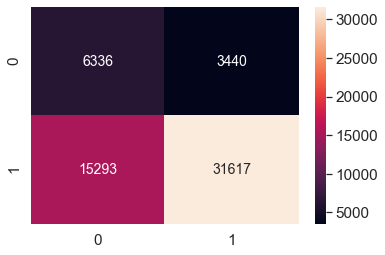

In [323]:
AZ_bus = pd.read_json('AZ_business_all.json')
targets = AZ_bus['is_open'].to_numpy()
features = AZ_bus[['time_open','reviews_per_week','density','relative_stars','relative_review_count']].astype(int).to_numpy()

kf = KFold(n_splits=5, shuffle=True)

t = []
p = []
accuracy_score_nb = []
probs_nb = []
for train_index, test_index in kf.split(features):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = targets[train_index], targets[test_index]
    RF = RandomForestClassifier(n_estimators=200, max_depth = 5, class_weight='balanced').fit(X_train, y_train)
    y_pred = RF.predict(X_test)
    p.append(y_pred)
    t.append(y_test)
    probs_nb.append(RF.predict_proba(X_test))
    accuracy_score_nb.append(accuracy_score(y_test, y_pred))

print(f'KNN Classification Accuracy Score: {np.mean(accuracy_score_nb)}')
flat_t = [item for sublist in t for item in sublist]
flat_p = [item for sublist in p for item in sublist]
tn, fp, fn, tp = confusion_matrix(flat_t, flat_p).ravel()
cm = confusion_matrix(flat_t, flat_p)
print(f'tn: {tn}, fn: {fn}, tp: {tp}, fp: {fp}')
print(tn / (tn+fp))

print(metrics.classification_report(flat_t, flat_p, target_names=['closed','open']))

df_cm = pd.DataFrame(cm, range(2), range(2))
print(df_cm)
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 14},fmt='g') # font size

plt.show()

KNN Classification Accuracy Score: 0.7274186516766225
tn: 5556, fn: 11231, tp: 35677, fp: 4220
0.5683306055646481
              precision    recall  f1-score   support

      closed       0.33      0.57      0.42      9776
        open       0.89      0.76      0.82     46908

    accuracy                           0.73     56684
   macro avg       0.61      0.66      0.62     56684
weighted avg       0.80      0.73      0.75     56684

       0      1
0   5556   4220
1  11231  35677


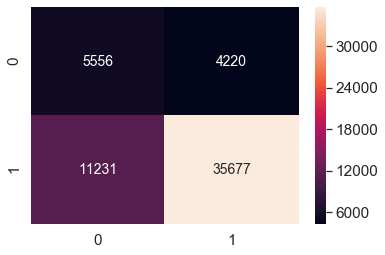

In [324]:
# targets = AZ_bus['is_open'].to_numpy()
# features = AZ_bus[['time_open','reviews_per_week','density','relative_stars','relative_review_count']].astype(int).to_numpy()
df = pd.read_json('AZ_test.json')
# print(df)
h = df.to_numpy()
# print(h)
features = h[:,:9]
targets = h[:,9]

kf = KFold(n_splits=5, shuffle=True)

t = []
p = []
accuracy_score_nb = []
probs_nb = []
for train_index, test_index in kf.split(features):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = targets[train_index], targets[test_index]
    RF = RandomForestClassifier(n_estimators=200, max_depth = 5, class_weight='balanced').fit(X_train, y_train)
    y_pred = RF.predict(X_test)
    p.append(y_pred)
    t.append(y_test)
    probs_nb.append(RF.predict_proba(X_test))
    accuracy_score_nb.append(accuracy_score(y_test, y_pred))

print(f'KNN Classification Accuracy Score: {np.mean(accuracy_score_nb)}')
flat_t = [item for sublist in t for item in sublist]
flat_p = [item for sublist in p for item in sublist]
tn, fp, fn, tp = confusion_matrix(flat_t, flat_p).ravel()
cm = confusion_matrix(flat_t, flat_p)
print(f'tn: {tn}, fn: {fn}, tp: {tp}, fp: {fp}')
print(tn / (tn+fp))

print(metrics.classification_report(flat_t, flat_p, target_names=['closed','open']))

df_cm = pd.DataFrame(cm, range(2), range(2))
print(df_cm)
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 14},fmt='g') # font size

plt.show()

In [249]:
AZ_bus.shape[0] - AZ_bus['is_open'].sum()

9776

In [254]:
def within_range(lat1, long1, lat2, long2):
    return abs(lat1-lat2) <= 1/69 and abs(long1-long2) <= 1 / (math.cos(lat1 * math.pi/180.) * 69.172)

In [261]:
def share_categories(c1, c2):
    if not c2 or not c1:
        return False
    else:
        cat1 = [a.strip() for a in c1.split(',')]
        cat2 = [y.strip() for y in c2.split(',')]
        return len([x for x in cat2 if x in cat2]) >= 2
#         return any(x in cat2 for x in cat1) or all(x in cat2 for x in cat1)

In [31]:
lst = []
lst.append(AZ_bus.iloc[0][['categories','business_id','is_open']].to_numpy())
lst.append(AZ_bus.iloc[1][['categories','business_id','is_open']].to_numpy())
lst = np.stack(lst)
print(lst[:,0])

['Golf, Active Life' 'Insurance, Financial Services']


In [290]:
# AZ_bus.to_json(r'AZ_business_all.json',orient='records')

# OLD DATA ML MODELS:

RF Classification Accuracy Score: 0.6580136293508492

tn: 2109, fn: 5224, tp: 10565, fp: 1363
0.6074308755760369
              precision    recall  f1-score   support

      closed       0.29      0.61      0.39      3472
        open       0.89      0.67      0.76     15789

    accuracy                           0.66     19261
   macro avg       0.59      0.64      0.58     19261
weighted avg       0.78      0.66      0.70     19261

      0      1
0  2109   1363
1  5224  10565


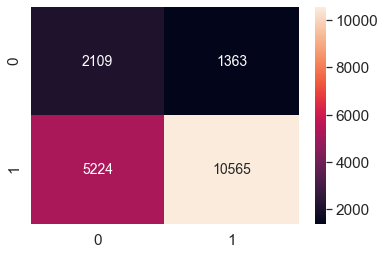

In [313]:
df_f = pd.read_json('ML/sample_features.json')
h = df_f.to_numpy()
features = h[:,:8]
targets = h[:,8]

kf = KFold(n_splits=10)

accuracy_RF = []
probs_RF = []
t = []
p = []
for train_index, test_index in kf.split(features):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = targets[train_index], targets[test_index]
    RF = RandomForestClassifier(n_estimators=200, max_depth = 5, class_weight='balanced').fit(X_train, y_train)
    y_pred = RF.predict(X_test)
    p.append(y_pred)
    t.append(y_test)
    probs_RF.append(RF.predict_proba(X_test))
    accuracy_RF.append(accuracy_score(np.where(y_pred>0,1,0), np.where(y_test>0,1,0)))

print(f'RF Classification Accuracy Score: {np.mean(accuracy_RF)}\n')
flat_t = [item for sublist in t for item in sublist]
flat_p = [item for sublist in p for item in sublist]
tn, fp, fn, tp = confusion_matrix(flat_t, flat_p).ravel()
cm = confusion_matrix(flat_t, flat_p)
print(f'tn: {tn}, fn: {fn}, tp: {tp}, fp: {fp}')
print(tn / (tn+fp))

print(metrics.classification_report(flat_t, flat_p, target_names=['closed','open']))

df_cm = pd.DataFrame(cm, range(2), range(2))
print(df_cm)
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 14},fmt='g') # font size

plt.show()
